# Laborator 5 - Moroianu Theodor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercitiu 1

$f_s = 44.100 Hz$

Daca avem $N$ esantioane, frecventa fundamentala este 
$
f = \frac{f_s}{N}
$
Formula provine din cursul 5, pagina 20.

Dorim ca $f = 1$. Asadar, $N = 44.100$.

## Exercitiu 2

In [27]:
# Definesc tipurile de fereastra.

def dreptunghiular(N):
    a = np.ones((N,))
    return a / a.sum()

def hanning(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.5 * (1 - np.cos(points))
    return a / a.sum()
    
def hamming(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.54 - 0.46 * np.cos(points)
    return a / a.sum()

def blackman(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.42 - 0.5 * np.cos(points) + 0.08 * np.cos(2 * points)
    return a / a.sum()

def flat_top(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = (0.22 -
        0.42 * np.cos(points) +
        0.28 * np.cos(2 * points) -
        0.08 * np.cos(2 * points) +
        0.007 * np.cos(4 * points))
    return a / a.sum()

def sine(frequency, time):
    return np.sin(2 * np.pi * frequency * time)


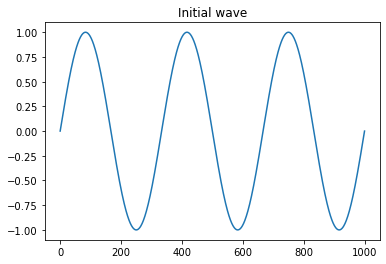

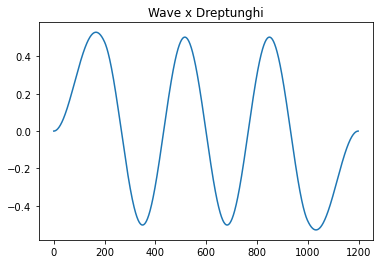

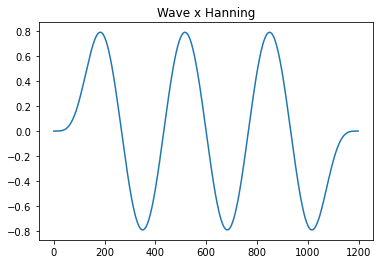

In [28]:
# A

wave = sine(100, np.linspace(0, 0.03, 1000))
plt.plot(wave)
plt.title("Initial wave")
plt.show()

# echivalent cu un sliding window
wave_square = np.convolve(wave, dreptunghiular(200))
plt.plot(wave_square)
plt.title("Wave x Dreptunghi")
plt.show()

# echivalent cu un sliding window
wave_hanning = np.convolve(wave, hanning(200))
plt.plot(wave_hanning)
plt.title("Wave x Hanning")
plt.show()

Waves


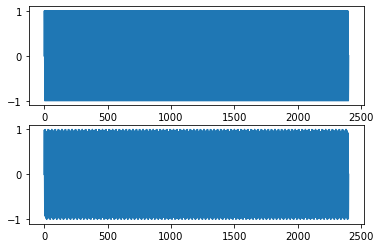

Pure FFT


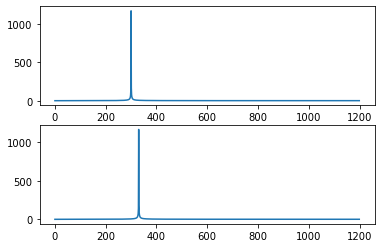

FFT Dreptunghi


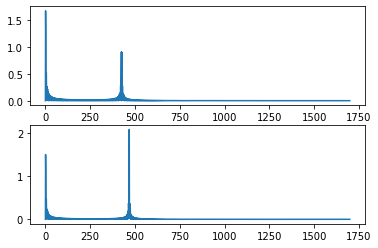

FFT Hamming


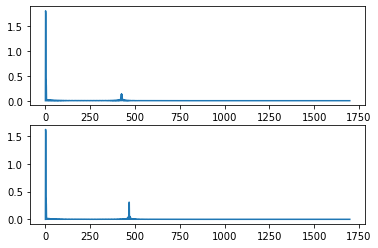

In [31]:
# B

## Nu am inteles daca trebuie sa efectuam o filtrarea printr-o convolutie, sau daca trebuie sa ne generam un semnal de 1000 de esantioane, si sa inmultim element-wise, asa ca am facut ambele variante.


# aici presupun ca inmultesc printr-o convolutie.
    
time_of_view = 0.3
wave_1 = sine(1000, np.linspace(0, time_of_view, int(8000 * time_of_view + 1)))
wave_2 = sine(1100, np.linspace(0, time_of_view, int(8000 * time_of_view + 1)))

rect_window = dreptunghiular(1000)
hamming_window = hamming(1000)

wave_1_filtered_drept = np.convolve(wave_1, rect_window)
wave_2_filtered_drept = np.convolve(wave_2, rect_window)

wave_1_filtered_flat = np.convolve(wave_1, hamming_window)
wave_2_filtered_flat = np.convolve(wave_2, hamming_window)

def compute_fft(wave):
    fft = np.fft.fft(wave)
    fft = np.abs(fft)
    fft = fft[: len(fft) // 2]
    return fft

wave_1_fft = compute_fft(wave_1)
wave_1_fft_drept = compute_fft(wave_1_filtered_drept)
wave_1_fft_flat = compute_fft(wave_1_filtered_flat)

wave_2_fft = compute_fft(wave_2)
wave_2_fft_drept = compute_fft(wave_2_filtered_drept)
wave_2_fft_flat = compute_fft(wave_2_filtered_flat)

print("Waves", flush=True)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1)
ax[1].plot(wave_2)
plt.show()

print("Pure FFT", flush=True)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft)
ax[1].plot(wave_2_fft)
plt.show()

print("FFT Dreptunghi")
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft_drept)
ax[1].plot(wave_2_fft_drept)
plt.show()

print("FFT Hamming")
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft_flat)
ax[1].plot(wave_2_fft_flat)
plt.show()



Waves


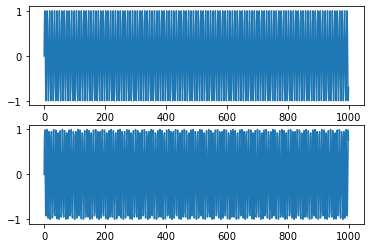

Pure FFT


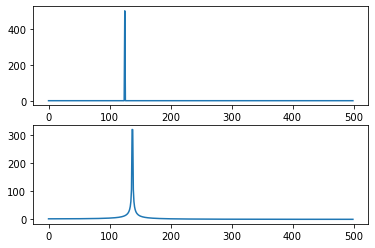

FFT Dreptunghi


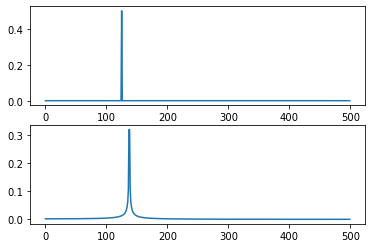

FFT Hamming


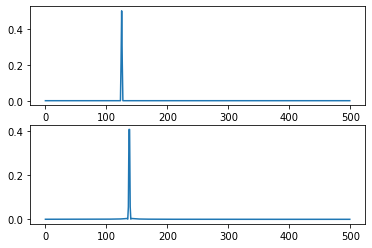

In [32]:

# aici presupun ca inmultesc element-wise.
    
time_of_view = 999 / 8000
wave_1 = sine(1000, np.linspace(0, time_of_view, int(8000 * time_of_view + 1)))
wave_2 = sine(1100, np.linspace(0, time_of_view, int(8000 * time_of_view + 1)))

rect_window = dreptunghiular(1000)
hamming_window = hamming(1000)

wave_1_filtered_drept = wave_1 * rect_window
wave_2_filtered_drept = wave_2 * rect_window

wave_1_filtered_flat = wave_1 * hamming_window
wave_2_filtered_flat = wave_2 * hamming_window

def compute_fft(wave):
    fft = np.fft.fft(wave)
    fft = np.abs(fft)
    fft = fft[: len(fft) // 2]
    return fft

wave_1_fft = compute_fft(wave_1)
wave_1_fft_drept = compute_fft(wave_1_filtered_drept)
wave_1_fft_flat = compute_fft(wave_1_filtered_flat)

wave_2_fft = compute_fft(wave_2)
wave_2_fft_drept = compute_fft(wave_2_filtered_drept)
wave_2_fft_flat = compute_fft(wave_2_filtered_flat)

print("Waves", flush=True)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1)
ax[1].plot(wave_2)
plt.show()

print("Pure FFT", flush=True)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft)
ax[1].plot(wave_2_fft)
plt.show()

print("FFT Dreptunghi")
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft_drept)
ax[1].plot(wave_2_fft_drept)
plt.show()

print("FFT Hamming")
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft_flat)
ax[1].plot(wave_2_fft_flat)
plt.show()

Vedem cu usurinta ca aplicarea unei ferestre de tip flat-top pe cea de-a doua sinusoida ajuta mult la evitarea leakage-ului.
Asadar, in practica am aplica fereastra pe cea de-a doua sinusoida. 

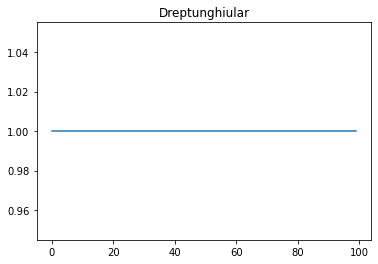

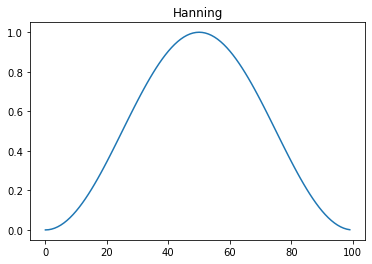

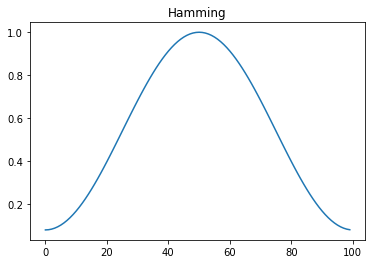

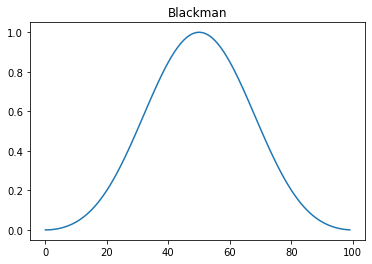

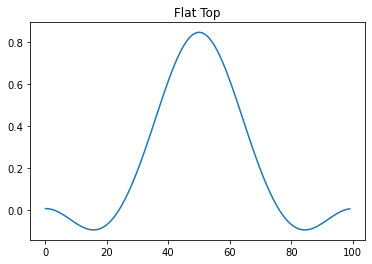

In [13]:
# C

plt.title("Dreptunghiular")
plt.plot(dreptunghiular(100))
plt.show()

plt.title("Hanning")
plt.plot(hanning(100))
plt.show()

plt.title("Hamming")
plt.plot(hamming(100))
plt.show()

plt.title("Blackman")
plt.plot(blackman(100))
plt.show()

plt.title("Flat Top")
plt.plot(flat_top(100))
plt.show()

## Exercitiu 3

Am rezolvat deja exercitiul 3 in laboratorul 2

Am citit 503 elemente. 24h * 7z * 3 sapt = 504


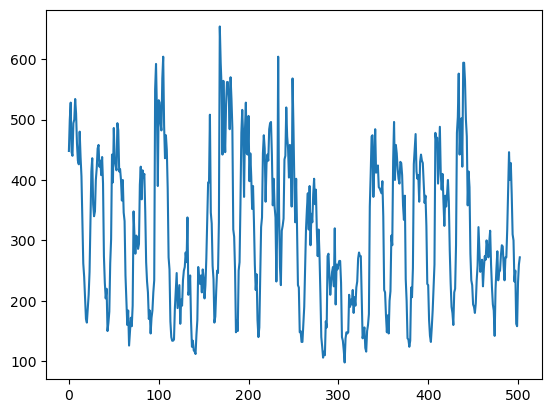

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Citim datele
with open('trafic.csv') as fin:
    reader = csv.reader(fin)
    data = np.array(list(reader))
    data = data[1:]
    data = [int(i) for i in data]

# Afisari de verificare
print(f"Am citit {len(data)} elemente. 24h * 7z * 3 sapt = {24 * 7 * 3}")
plt.plot(data)
plt.show()

Datele pentru 3 zile ne-procesate:


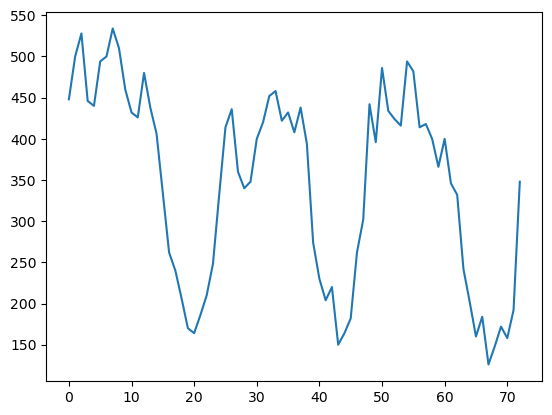

In [ ]:
raw_3d = data[:24 * 3 + 1]
print(f"Datele pentru 3 zile ne-procesate:")
plt.plot(raw_3d)
plt.show()

Clean signal:


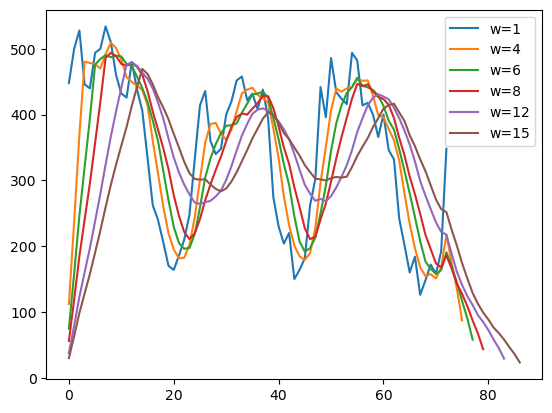

In [ ]:
# filtru de netezire
def clean_signal(signal, strength):
    return np.convolve(signal, np.ones(strength)) / strength

strengths = [1, 4, 6, 8, 12, 15]
clean_3d = [clean_signal(raw_3d, i) for i in strengths]
print("Clean signal:")
for i in clean_3d:
    plt.plot(i)
plt.legend([f"w={i}" for i in strengths])
# plt.plot(clean_3d) #,# ["Smooth 2", 'sd', 'd', 'ff'])
plt.show()

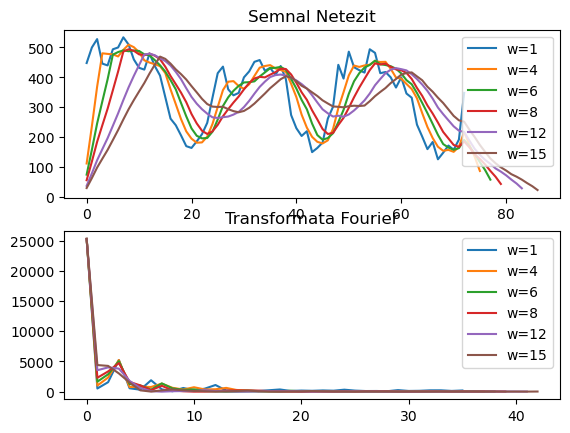

In [ ]:
# Transformata Fourier
def compute_fft(semnal):
    fft = np.fft.fft(semnal)
    fft = fft[: len(fft) // 2]
    fft = np.abs(fft)
    return fft

fft = [compute_fft(i) for i in clean_3d]


fig, axes = plt.subplots(ncols=1, nrows=2)

for i in clean_3d:
    axes[0].plot(i)
axes[0].set_title("Semnal Netezit")
axes[0].legend([f"w={i}" for i in strengths])

for i in fft:
    axes[1].plot(i)

axes[1].legend([f"w={i}" for i in strengths])
axes[1].set_title("Transformata Fourier")
plt.show()